<a href="https://colab.research.google.com/github/sarathkumar1304/takehome_user-assingment/blob/main/Take_home_user.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Reading the csv files

In [10]:
df1=pd.read_csv("takehome_users.csv",encoding='utf8',encoding_errors='ignore')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
df1.rename(columns={"object_id":"user_id"},inplace =True)
df1.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
df1.shape

(12000, 10)

In [14]:
df2=pd.read_csv("/content/takehome_user_engagement.csv",encoding="latin-1")
df2.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
df2.shape

(207917, 3)

In [16]:
merged_data=pd.merge(df1,df2,how="right",on="user_id")

In [18]:
merged_data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


In [19]:
merged_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [20]:
merged_data.shape

(207917, 12)

In [28]:
merged_data['date'] = merged_data['time_stamp'].astype('datetime64')
merged_data['week'] = merged_data["date"].dt.isocalendar().week
merged_data["month"]=merged_data["date"].dt.month
merged_data["year"]=merged_data["date"].dt.isocalendar().year


In [34]:
df=pd.DataFrame(merged_data[['date','week','month','year']]) 
df

,date,week,month,year
0,2014-04-22 03:53:30,17,4,2014
1,2013-11-15 03:45:04,46,11,2013
2,2013-11-29 03:45:04,48,11,2013
3,2013-12-09 03:45:04,50,12,2013
4,2013-12-25 03:45:04,52,12,2013
...,...,...,...,...
207912,2013-09-06 06:14:15,36,9,2013
207913,2013-01-15 18:28:37,3,1,2013
207914,2014-04-27 12:45:16,17,4,2014
207915,2012-06-02 11:55:59,22,6,2012


In [38]:
groupby_week=merged_data.groupby(["user_id","week","month","year"])["visited"].count().reset_index()

In [39]:
groupby_week.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [41]:
adopted_user=groupby_week.loc[groupby_week["visited"]>=3]

In [42]:
adopted_user

,user_id,week,month,year,visited
3,2,6,2,2014,3
17,10,1,1,2014,4
19,10,2,1,2014,4
21,10,3,1,2014,6
23,10,4,1,2014,6
...,...,...,...,...,...
75887,11975,52,12,2013,3
75905,11988,12,3,2014,4
75912,11988,18,4,2014,3
75915,11988,20,5,2014,3


In [44]:
len(adopted_user)

32754

In [45]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x:"adopted_user" if x>=3 else "non adopted_user")

In [46]:
groupby_week.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,non adopted_user
1,2,1,12,2014,1,non adopted_user
2,2,2,1,2014,1,non adopted_user
3,2,6,2,2014,3,adopted_user
4,2,7,2,2014,2,non adopted_user


In [47]:
df3 = groupby_week[(groupby_week['visited']>=3)]
df3.head()

,user_id,week,month,year,visited,adopted_user
3,2,6,2,2014,3,adopted_user
17,10,1,1,2014,4,adopted_user
19,10,2,1,2014,4,adopted_user
21,10,3,1,2014,6,adopted_user
23,10,4,1,2014,6,adopted_user


# Data visualization

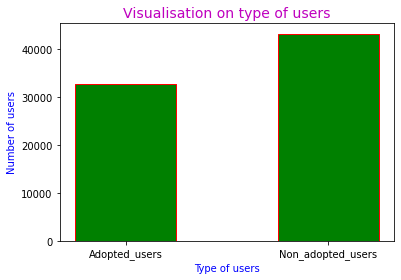

In [48]:
x = ['Adopted_users','Non_adopted_users']
y = [(groupby_week.adopted_user.value_counts()[1]),(groupby_week.adopted_user.value_counts()[0])]
plt.bar(x,y,color='g',edgecolor='r',width=0.5)

plt.xlabel("Type of users",color='blue')
plt.ylabel("Number of users",color='blue')
plt.title("Visualisation on type of users",color='m',fontsize=14)
plt.show()

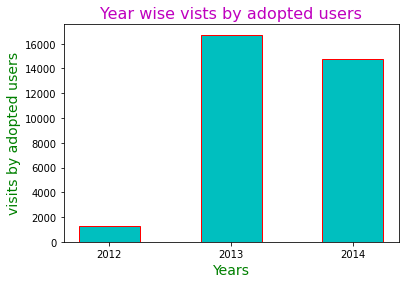

In [49]:
x = ['2012','2013','2014']
q= df3.year.value_counts()
y = [q[2012],q[2013],q[2014]]
plt.bar(x,y,color='c',edgecolor='r',width=0.5)

plt.xlabel("Years",color='g',fontsize=14)
plt.ylabel("visits by adopted users",color='g',fontsize=14)
plt.title("Year wise vists by adopted users",color='m',fontsize=16)
plt.show()

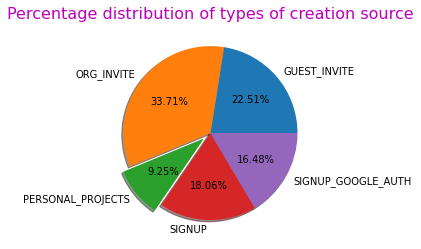

In [50]:
q = merged_data.groupby(['creation_source']).size().values
p = merged_data.groupby(['creation_source']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x,explode= (0,0,0.1,0,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of types of creation source", color = 'm',fontsize=16)
plt.show()

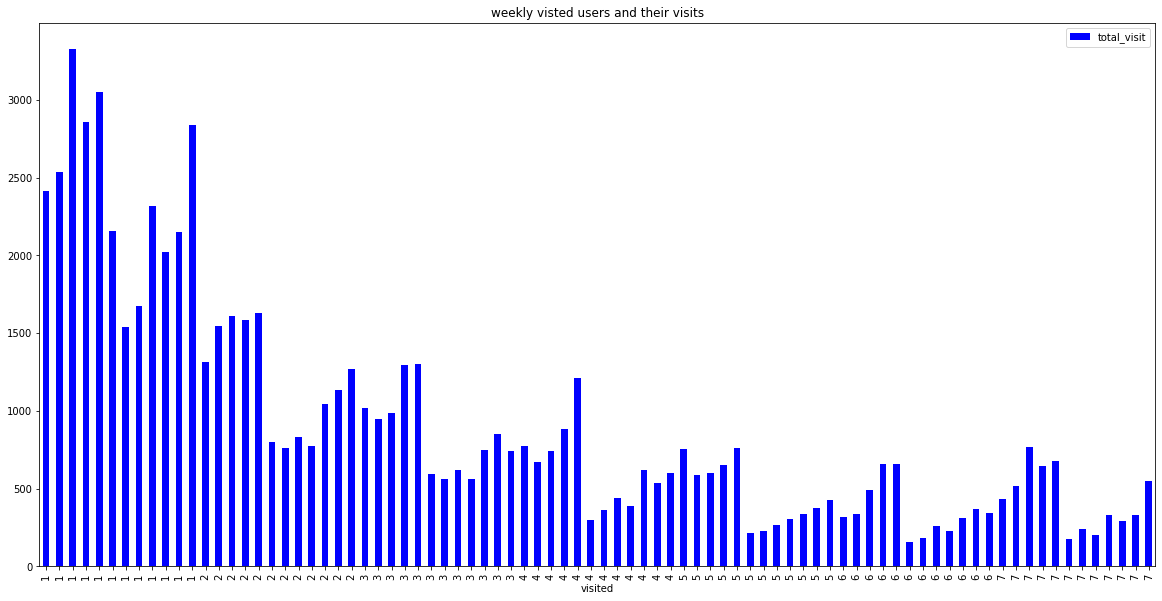

In [52]:
df5=groupby_week
df5= df5.groupby(['visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()
t= df5[df5['total_visit']>=3]
t.plot.bar(x='visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits",color='blue')
plt.show()

Total no of adopted users are 1416 where org_invite contributes higher no of adopted users and personal projects contributes in less nos.